<a href="https://colab.research.google.com/github/gunjak/Placement-Assignment_Gunja/blob/main/Dl_ques1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy
from tensorflow import keras
num_classes=10

In [ ]:
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()
train_images,test_images=train_images/255.0,test_images/255.0
train_images = numpy.expand_dims(train_images, -1)
test_images = numpy.expand_dims(test_images, -1)
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [ ]:
train_images[0].shape

(28, 28, 1)

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


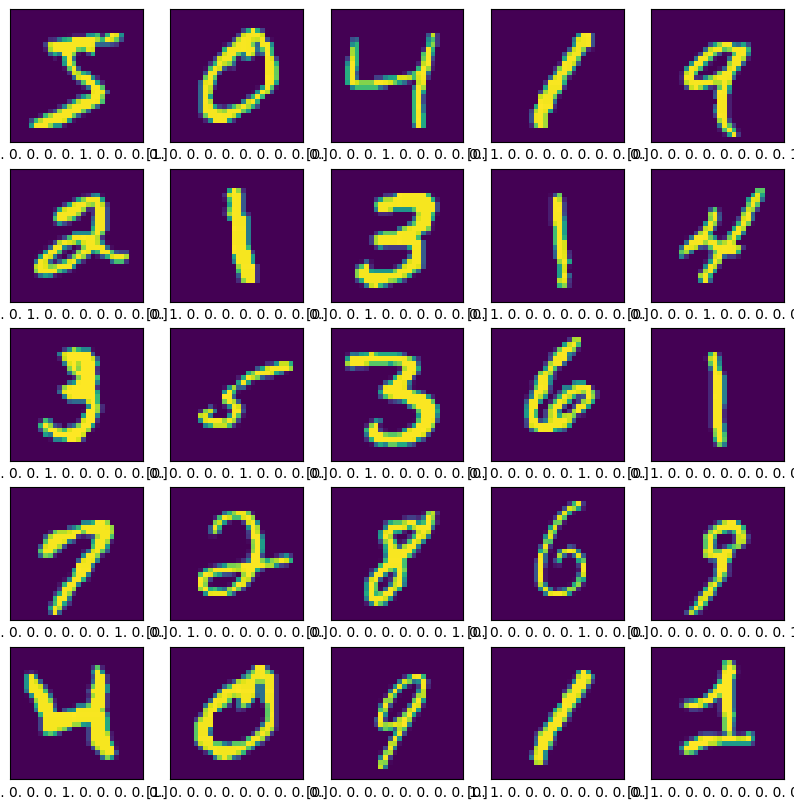

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
model1=models.Sequential()
model1.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(16,(3,3),activation='relu'))
model1.add(layers.MaxPooling2D(3,3))
model1.add(layers.Flatten())
model1.add(layers.Dense(16,activation='relu'))
model1.add(layers.Dense(10,activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 144)               0         
                                                                 
 dense (Dense)               (None, 16)                2

In [ ]:
model2=models.Sequential()
model2.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model2.add(layers.MaxPooling2D((3,3)))
model2.add(layers.Conv2D(16,(3,3),activation='relu'))
model2.add(layers.MaxPooling2D(3,3))
model2.add(layers.Flatten())
model2.add(layers.Dense(32,activation='relu'))
layers.Dropout(0.5)
model2.add(layers.Dense(10,activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 16)          4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [ ]:
model3=models.Sequential()
model3.add(layers.Conv2D(32,(1,1),activation='relu',input_shape=(28,28,1)))
model3.add(layers.MaxPooling2D((3,3),strides=2))
model3.add(layers.Conv2D(16,(2,2),activation='relu'))
model3.add(layers.MaxPooling2D(3,3))
model3.add(layers.Flatten())
model3.add(layers.Dense(16,activation='relu'))
model3.add(layers.Dense(10,activation='softmax'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        64        
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 16)        2064      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 16)               

In [ ]:
from tensorflow.keras.metrics import Precision, Recall
BATCH_SIZE = 2
EPOCHS = 2

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model1.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

model2.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

model3.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

# Train the model


In [ ]:
training_history = model1.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_images, test_labels))

Epoch 1/2
30000/30000 [==============================] - 152s 5ms/step - loss: 0.1312 - accuracy: 0.9593 - precision: 0.9663 - recall: 0.9535 - val_loss: 0.0757 - val_accuracy: 0.9761 - val_precision: 0.9795 - val_recall: 0.9736
Epoch 2/2
30000/30000 [==============================] - 136s 5ms/step - loss: 0.0704 - accuracy: 0.9787 - precision: 0.9811 - recall: 0.9769 - val_loss: 0.0643 - val_accuracy: 0.9806 - val_precision: 0.9818 - val_recall: 0.9780


In [ ]:
training_history = model2.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_images, test_labels))

Epoch 1/2
30000/30000 [==============================] - 126s 4ms/step - loss: 0.1703 - accuracy: 0.9464 - precision: 0.9658 - recall: 0.9411 - val_loss: 0.0863 - val_accuracy: 0.9731 - val_precision: 0.9760 - val_recall: 0.9709
Epoch 2/2
30000/30000 [==============================] - 117s 4ms/step - loss: 0.0753 - accuracy: 0.9760 - precision: 0.9785 - recall: 0.9740 - val_loss: 0.0798 - val_accuracy: 0.9766 - val_precision: 0.9793 - val_recall: 0.9739


In [ ]:
EPOCHS,BATCH_SIZE=5,100
training_history = model3.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_images, test_labels))

Epoch 1/5
600/600 [==============================] - 36s 59ms/step - loss: 0.1468 - accuracy: 0.9537 - precision: 0.9608 - recall: 0.9477 - val_loss: 0.1429 - val_accuracy: 0.9536 - val_precision: 0.9602 - val_recall: 0.9476
Epoch 2/5
600/600 [==============================] - 32s 53ms/step - loss: 0.1414 - accuracy: 0.9558 - precision: 0.9631 - recall: 0.9500 - val_loss: 0.1396 - val_accuracy: 0.9542 - val_precision: 0.9602 - val_recall: 0.9482
Epoch 3/5
600/600 [==============================] - 33s 55ms/step - loss: 0.1393 - accuracy: 0.9557 - precision: 0.9631 - recall: 0.9499 - val_loss: 0.1384 - val_accuracy: 0.9547 - val_precision: 0.9603 - val_recall: 0.9485
Epoch 4/5
600/600 [==============================] - 33s 54ms/step - loss: 0.1376 - accuracy: 0.9564 - precision: 0.9633 - recall: 0.9512 - val_loss: 0.1383 - val_accuracy: 0.9546 - val_precision: 0.9610 - val_recall: 0.9498
Epoch 5/5
600/600 [==============================] - 33s 55ms/step - loss: 0.1361 - accuracy: 0.9574